# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data

# TODO: group params better
# need to have this to get data
DATA_LOCATION = 'data/traffic-signs/'

# can create this on-the-fly, ok if already created
TENSOR_PATH = DATA_LOCATION + 'tf/'


import pickle
import os

os.makedirs(TENSOR_PATH, exist_ok = True)

training_file = 'train.p'
testing_file = 'test.p'

with open(DATA_LOCATION + training_file, mode='rb') as f:
    train = pickle.load(f)
train_features, train_labels = train['features'], train['labels']
    
with open(DATA_LOCATION + testing_file, mode='rb') as f:
    test = pickle.load(f)
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train_features)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (len(train_features[0]), len(train_features[0][0]), len(train_features[0][0][0]))

labels = {}
for label in train_labels:
    if (not labels.get(label)):
        labels[label] = 0
    labels[label] += 1
    
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

Random image:


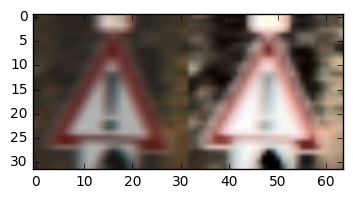

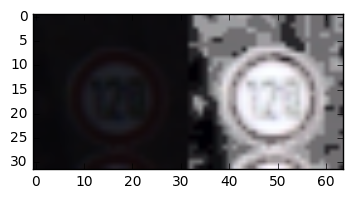

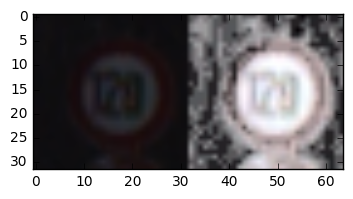

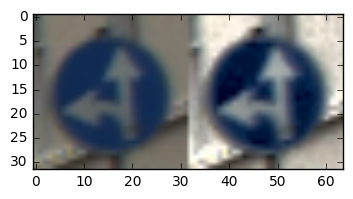

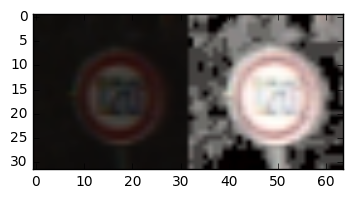

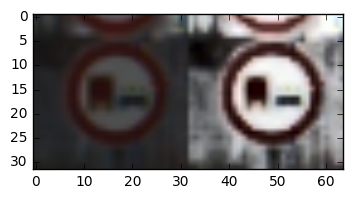

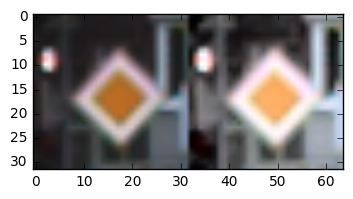

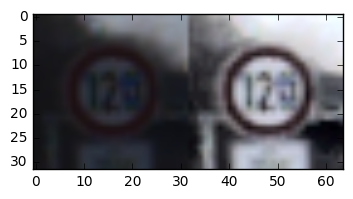

In [4]:

def max_contrast(img):
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    lab_img[:,:,0] = cv2.equalizeHist(lab_img[:,:,0])
    return cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB)

def image_pair(img_in):
    contrast = max_contrast(img_in)
    return np.hstack((img_in.squeeze(), contrast.squeeze()))

print("Random image:")

for i in range(8):
    index = random.randint(0, len(train_features))
    image = train_features[index]

    plt.figure(figsize=(4,4))
    plt.imshow(image_pair(image))

#plt.show()

Label frequency:


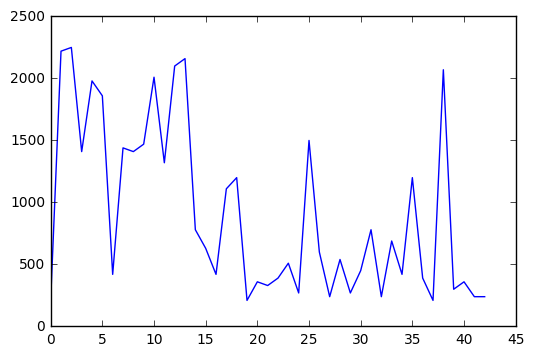

In [5]:
print("Label frequency:")
plt.plot(list(labels.keys()),list(labels.values()))
plt.show()

Descending by frequency:


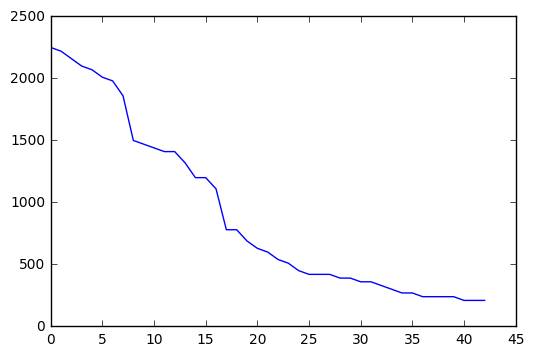

In [6]:
import operator
print("Descending by frequency:")
labels_by_frequency = list(map(lambda x: x[1], sorted(labels.items(), key=operator.itemgetter(1), reverse = True)))
plt.plot(labels_by_frequency)
plt.show()

In [7]:
print("Data:")
freq_min, freq_max, _, _ = cv2.minMaxLoc(np.array(list(labels.values())))
print("Min frequency:", freq_min, "\nMax frequency:", freq_max, "\nRatio:", freq_max / freq_min, "\n")
for k in labels.keys():
    print("Label: {k}, Frequency: {v}".format_map({'k': k, 'v': labels[k]}))


Data:
Min frequency: 210.0 
Max frequency: 2250.0 
Ratio: 10.714285714285714 

Label: 0, Frequency: 210
Label: 1, Frequency: 2220
Label: 2, Frequency: 2250
Label: 3, Frequency: 1410
Label: 4, Frequency: 1980
Label: 5, Frequency: 1860
Label: 6, Frequency: 420
Label: 7, Frequency: 1440
Label: 8, Frequency: 1410
Label: 9, Frequency: 1470
Label: 10, Frequency: 2010
Label: 11, Frequency: 1320
Label: 12, Frequency: 2100
Label: 13, Frequency: 2160
Label: 14, Frequency: 780
Label: 15, Frequency: 630
Label: 16, Frequency: 420
Label: 17, Frequency: 1110
Label: 18, Frequency: 1200
Label: 19, Frequency: 210
Label: 20, Frequency: 360
Label: 21, Frequency: 330
Label: 22, Frequency: 390
Label: 23, Frequency: 510
Label: 24, Frequency: 270
Label: 25, Frequency: 1500
Label: 26, Frequency: 600
Label: 27, Frequency: 240
Label: 28, Frequency: 540
Label: 29, Frequency: 270
Label: 30, Frequency: 450
Label: 31, Frequency: 780
Label: 32, Frequency: 240
Label: 33, Frequency: 689
Label: 34, Frequency: 420
Label:

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
# Pseudo-LeNet model

# TODO: group params better
EPOCHS = 100
BATCH_SIZE = 128

import tensorflow as tf

from tensorflow.contrib.layers import flatten

def activate(x):
    return tf.nn.relu(x)

def pool(layer, pool_size, stride=-1):
    if (stride < 0):
        stride = pool_size
    return tf.nn.max_pool(layer, ksize=[1, pool_size, pool_size, 1], strides=[1, stride, stride, 1], padding='VALID')
    

def fc_layer(prev_layer, o_size, mu=0, sigma=0.1):
    i_size = prev_layer.get_shape()[1].value
    layer_weights = tf.Variable(tf.truncated_normal(shape=(i_size, o_size), mean = mu, stddev = sigma))
    layer_biases = tf.Variable(tf.zeros(o_size))
    return tf.matmul(prev_layer, layer_weights) + layer_biases
    
def conv_layer(prev_layer, o_depth, k_size=5, stride=1, mu=0, sigma=0.1):
    i_depth = prev_layer.get_shape()[3].value
    layer_weights = tf.Variable(tf.truncated_normal(shape=(k_size, k_size, i_depth, o_depth), mean = mu, stddev = sigma))
    layer_biases = tf.Variable(tf.zeros(o_depth))
    return tf.nn.conv2d(prev_layer, layer_weights, strides=[1, stride, stride, 1], padding='VALID') + layer_biases
    
def LeNet(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    layer1 = activate(conv_layer(x, 6))
    layer1 = pool(layer1, 2)

    # Layer 2: Convolutional. Output = 10x10x16.
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2 = activate(conv_layer(layer1, 16))
    layer2 = pool(layer2, 2)

    # Flatten. Input = 5x5x16. Output = 400.
    layer2 = flatten(layer2)    
    
    # Dropout to avoid overfitting
    layer2 = tf.nn.dropout(layer2, keep_prob)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    layer3 = activate(fc_layer(layer2, 120, mu, sigma))
    
    # Dropout to avoid overfitting
    layer3 = tf.nn.dropout(layer3, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    layer4 = activate(fc_layer(layer3, 84, mu, sigma))

    # Dropout to avoid overfitting
    layer4 = tf.nn.dropout(layer4, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    # NO ACTIVATION
    logits = fc_layer(layer4, n_classes, mu, sigma)

    return logits

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import math

_image_center = (image_shape[0] / 2, image_shape[1] / 2)
print("image center is", _image_center)
_rotation_list = []
for r in range(10,2,-2):
    _rotation_list.append(cv2.getRotationMatrix2D(_image_center, r, 1))
    _rotation_list.append(cv2.getRotationMatrix2D(_image_center, -r, 1))

_translation_list = []
# shift up to 10% of image size
xrange = math.ceil(image_shape[0] / 10)
yrange = math.ceil(image_shape[1] / 10)
for y in range(-yrange, yrange, 2):
    for x in range(-xrange, xrange, 2):
        M = np.float32([
            [1, 0, x],
            [0, 1, y]
        ])
        _translation_list.append(M)

t_count = len(_translation_list)
r_count = len(_rotation_list)
print("{} rotations and {} translations for a factor of {}x".format(r_count, t_count, r_count * t_count))

def do_warps(images, transform_list):
    warps = []
    for img in images:
        for transform in transform_list:
            warps.append(cv2.warpAffine(img, transform, img.shape[:2]))
    return warps

def do_translations(images):
    return do_warps(images, _translation_list)

def do_rotations(images):
    return do_warps(images, _rotation_list)

def do_noise(images, out_count = 8):
    noisy = []
    for img in images:
        w,h,d = img.shape
        for i in range(out_count):
            noise = np.random.normal(0,0.05,(w,h,d))
            noised = img + img * noise
            noisy.append(noised)
    return noisy
#
### Generate multiple output images based on a single input
### Perform various rotations and projections from input image
### Input is a single image, output is original + N transformed images
### Transforms are multiplicative - N = rotations * translations * noises
def random_warp(img):
    warped = [img]
    
    warped = do_rotations(warped)
    warped = do_translations(warped)
    # noise function is broken in some weird way
    # it ends up blowing up AND changing the colorspace of the original?!
    #warped = do_noise(warped, 2)
    return warped


image center is (16.0, 16.0)
8 rotations and 16 translations for a factor of 128x


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Preprocessing only happens on input to training and testing. For both, data is processed to maximize histogram separation. [Cireșan, et al](http://people.idsia.ch/~juergen/nn2012traffic.pdf) suggests a similar approach, but with additional local histogram equalization and contrast enhancement. For training, images are translated and rotated by various increments to increase the quantity and variability of the training data (in this case 128x as many images). This is substantially similar to [Howard](https://ai2-s2-pdfs.s3.amazonaws.com/d671/75d17c450ab0ac9c256103828f9e9a0acb85.pdf) for the initial image processing step before subsequent scaling and cropping. I would also like to add random noise to the "warped" images, but was unable to work through `cv2` vs `matplotlib` and general `python` problems that caused massive corruption instead of light noise.


Random image:


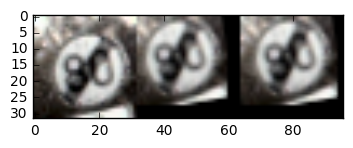

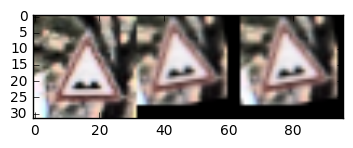

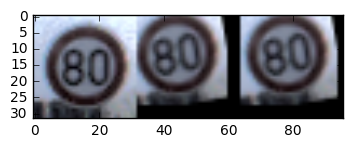

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def compare(img_in):
    alts = random_warp(img_in)
    
    return np.hstack((img_in.squeeze(), alts[0].squeeze(), alts[1].squeeze()))

print("Random image:")

for i in range(3):
    index = random.randint(0, len(train_features) - 1)
    image = max_contrast(train_features[index])

    plt.figure(figsize=(4,4))
    plt.imshow(compare(image))


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Training and validation are done by splitting a random 10% of data per epoch as a validation set. The model is saved after each epoch, then both the validation and test data sets are checked. After both checks, the model is restored from the previous snapshot to ensure no "cheating" where the model can see the test data a priori.

Additional data is generated as above, via translation and rotation.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture is essentially the LeNet architecture from the previous project.
 * First layer is a `5x5` convolutional layer with 6 outputs and `relu` activation
 * Second layer is `maxpool` of 2 with stride 1
 * Third layer is another `5x5` convolutional layer with 16 outputs and `relu` activation
 * Fourth layer is another `maxpool` of 2 with stride 1
 * Fifth layer is fully connected with 120 outputs and `relu` activation
 * Sixth layer is fully connected with 84 outputs and `relu` activation
 * Seventh layer is the classification layer, fully connected with `n_classes=43` outputs
 
Dropout is added after flattening (layer 4) and between FC layers 5, 6 and 7 for training, 


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


In [11]:
# Training, validation and optimization configs

# TODO: group params better
LEARNING_RATE = 0.001

# features
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
# labels
y = tf.placeholder(tf.int32, (None))
# dropout
k = tf.placeholder(tf.float32, (None))

one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, k)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver(max_to_keep = 100, name = 'traffic_signs', restore_sequentially = True)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, k: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
# DO THE HARD WORK HERE

from sklearn.utils import shuffle

# TODO: group params better
VALIDATION_SET_PERCENT = 10
CUTOFF_ACCURACY = 0.99
DROPOUT_KEEP_PROB = 0.8



validation_set_size = math.floor(len(train_features) * (VALIDATION_SET_PERCENT / 100))
best_accuracy = 0.0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    for i in range(1, EPOCHS + 1):
        train_features, train_labels = shuffle(train_features, train_labels)

        X_validation, y_validation = train_features[:validation_set_size], train_labels[:validation_set_size]
        X_train, y_train = train_features[validation_set_size:], train_labels[validation_set_size:]
        
        num_examples = len(X_train)

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            batch_x = []
            batch_y = []
            
            # DO DATA EXPANSION HERE
            # 128x, yeah baby!
            for Xt, yt in zip(X_train[offset:end], y_train[offset:end]):
                warps = random_warp(Xt)
                warp_count = len(warps)
                batch_x.extend(warps)
                batch_y.extend([yt] * warp_count)
    
            batch_x, batch_y = shuffle(batch_x, batch_y)

            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, k: DROPOUT_KEEP_PROB})

        saver.save(sess, TENSOR_PATH + 'traffic_sign_TEST')
        validation_accuracy = evaluate(X_validation, y_validation)
        test_accuracy = evaluate(X_test, y_test)
        saver.restore(sess, TENSOR_PATH + 'traffic_sign_TEST')
        
        print("EPOCH {}, Validation Accuracy = {:.1f}, Test Accuracy = {:.1f}".format(i, validation_accuracy * 100, test_accuracy * 100))

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            saver.save(sess, TENSOR_PATH + 'best')
            #print("Improved model saved")
        if validation_accuracy > CUTOFF_ACCURACY:
            break

    # keep this in session
    saver.save(sess, TENSOR_PATH + 'final')
    print("Final model saved")

print("Final accuracy = {:.1f}, best = {:.1f}".format(validation_accuracy * 100, best_accuracy * 100))


Training...

EPOCH 1, Validation Accuracy = 12.5, Test Accuracy = 12.6
EPOCH 2, Validation Accuracy = 25.0, Test Accuracy = 24.7
EPOCH 3, Validation Accuracy = 46.3, Test Accuracy = 45.1
EPOCH 4, Validation Accuracy = 54.8, Test Accuracy = 52.3
EPOCH 5, Validation Accuracy = 63.6, Test Accuracy = 59.9
EPOCH 6, Validation Accuracy = 70.9, Test Accuracy = 65.9
EPOCH 7, Validation Accuracy = 77.3, Test Accuracy = 72.6
EPOCH 8, Validation Accuracy = 82.5, Test Accuracy = 77.9
EPOCH 9, Validation Accuracy = 87.0, Test Accuracy = 81.1
EPOCH 10, Validation Accuracy = 87.9, Test Accuracy = 83.3
EPOCH 11, Validation Accuracy = 90.9, Test Accuracy = 86.5
EPOCH 12, Validation Accuracy = 92.0, Test Accuracy = 88.3
EPOCH 13, Validation Accuracy = 93.7, Test Accuracy = 89.7
EPOCH 14, Validation Accuracy = 94.4, Test Accuracy = 90.6
EPOCH 15, Validation Accuracy = 95.1, Test Accuracy = 91.4
EPOCH 16, Validation Accuracy = 96.2, Test Accuracy = 92.3
EPOCH 17, Validation Accuracy = 96.7, Test Accuracy 

**Answer:**

I selected the same optimizer that was used in the previous project. I confirmed that it was the best for this particular use-case by referencing [Sebastian Ruder's optimization page](http://sebastianruder.com/optimizing-gradient-descent/index.html#visualizationofalgorithms) which recommends `Adam` as one of the best options, and particularly for our use case it should work well.

Batch size is set at 128, but that means a slice of 128 of the original training images. Those are expanded by 128x to result in actual batch sizes of `128 x 128 = 16384`. 100 epochs were experimented with, and the best result was saved at each epoch as well as the final model. Early cutoff happens when the validation accuracy goes above 99%, usually around 30 epochs. Each epoch took about 2 minutes on a 1070 GPU with `tensorflow-gpu` and `cuda` / `cudnn` libraries installed. The hyperparameters are partly defined in the architecture above, where FC layers of 120 and 84 were arbitrary. The learning rate was left at 0.001 since it seemed sufficient to make progress without bouncing across the gradient minima. The only other parameters are for dropout (20%) and validation set size (10%).


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The majority of the solution was lifted from project 1, since the LeNet architecture is very well-suited to classifying a set of images into categories. I researched some of the individual steps as referenced above, looking for ways to normalize and expand the testing and training data. The biggest trial-and-error parts of this project were working with Python and OpenCV to get data into the right formats in the right places. After the basic implementation was already complete I discovered the [CIFAR dataset and reference model](https://www.tensorflow.org/tutorials/deep_cnn/), which would have been faster for multi-GPU training, and may have resulted in more accurate classification.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

File data/traffic-signs/sample-1-speedlimit30.png category 1


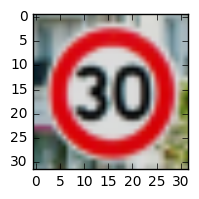

File data/traffic-signs/sample-14-stop.png category 14


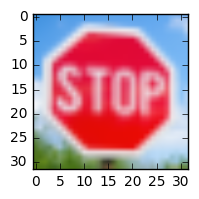

File data/traffic-signs/sample-2-speedlimit50kph.png category 2


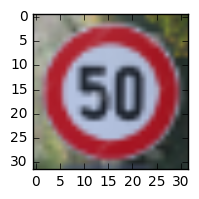

File data/traffic-signs/sample-27-pedestrians.png category 27


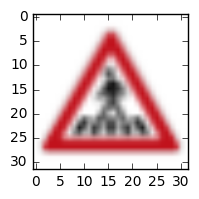

File data/traffic-signs/sample-29-bicycles.png category 29


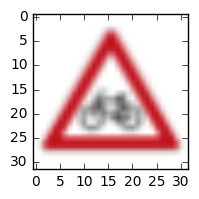

File data/traffic-signs/sample-31-wildanimal.png category 31


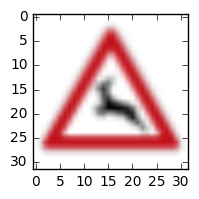

File data/traffic-signs/sample-38-keepright.png category 38


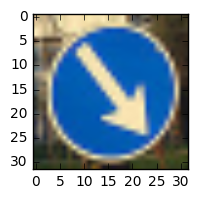

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

# a bunch of arbitrary german traffic images from Wikipedia and others
import glob
final_test_sources = glob.glob(DATA_LOCATION + '*.png')

final_exam_images = []
final_exam_labels = []

for img_name in final_test_sources:

    image = mpimg.imread(img_name)
    category = img_name.split('-')[2]
    final_exam_images.append(image)
    final_exam_labels.append(category)
    
    print("File {} category {}".format(img_name, category))
    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The fact that most of the images are idealized could go either way. They might be too normal for the classifier which expects some noise and hasn't seen these as inputs, but I would expect that the deep and convolutional nature of the classifier would see the image features vs expecting detailed data. In all cases having a static, high-resolution image that's being downsampled to 32x32 is very different from the training data. Even the camera of the original might be a contributing factor, in that the model is trained on whatever imperfections or patterns may have existed there.

In [14]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # quick-load our most-recent best in the event the model hasn't been built this iteration
    saver.restore(sess, TENSOR_PATH + 'final')
    
    topk_weights, topk_labels = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: final_exam_images, k: 1.0})


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
It's horrendous. Zero percent `top_k` = 5 accuracy.

In [15]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

for answer, labels, weights in zip(final_exam_labels, topk_labels, topk_weights):
    combo = dict(zip(labels, weights))
    print(answer, combo)


1 {40: -0.3600409, 33: -0.14917506, 4: 0.20439799, 5: 0.07818377, 38: -0.24480343}
14 {12: -0.18375736, 18: -0.13795888, 4: -0.18225555, 13: 1.3210535, 5: 0.33672959}
2 {40: -0.14377292, 33: -0.34070516, 4: -0.28886217, 5: 0.032018244, 38: -0.2132861}
27 {40: -0.42542779, 18: 0.41920254, 5: -0.89958048, 30: -1.0078919, 31: -1.0041462}
29 {18: -1.3939984, 3: -0.95695508, 4: -0.76716477, 5: -0.7246834, 13: -1.1387618}
31 {9: -1.3462973, 10: -1.2358906, 3: -0.99364853, 5: -0.89726233, 31: -0.48310888}
38 {40: 0.84670442, 18: 0.31235605, 4: -0.75520152, 13: -0.8002978, 38: 2.4133775}


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

It's uncertain even that it has no clue. Even when running `top_k` for `k = 43` the results are entirely useless. The maximum confidence is something around 3, and most of the time the top 5 are either negative or < 1.0.

The best way to improve this would be to augment the training set with additional non-normalized static images, providing more real-life snapshots versus video frames. It would also be interesting to try various resizing algorithms to see if any of them make a difference - I would imagine that smoothing the reductions would help, versus the existing images which are mostly nearest-neighbor or linear sampling.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.